In [46]:
import mglearn
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [10]:
len(X_train),len(y_train),len(X_test),len(y_test)

(426, 426, 143, 143)

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=[10,10], max_iter= 1000, random_state=0)
mlp.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=1000, random_state=0)

In [66]:
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.9178403755868545, 0.9370629370629371)

 - 평균 0, 분산 1이 가지도록 데이터를 변형해주면 성능이 좋아질 수 있다.
 - standardscaler : 데이터를 표준화

In [67]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=[10,10], max_iter= 1000, random_state=0)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=1000, random_state=0)

In [113]:
mlp.score(X_train_scaled,y_train), mlp.score(X_test_scaled,y_test)

(0.9929577464788732, 0.9440559440559441)

In [149]:
mlp = MLPClassifier(hidden_layer_sizes=[10,10,10], max_iter= 1000, random_state=0, alpha=2)
mlp.fit(X_train_scaled,y_train)
mlp.score(X_train_scaled,y_train), mlp.score(X_test_scaled,y_test)

(0.9882629107981221, 0.972027972027972)

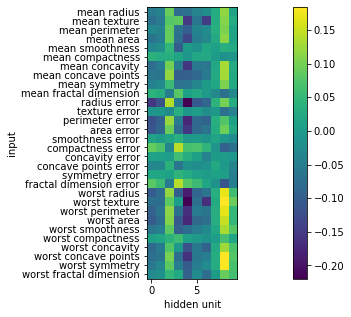

In [157]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input")
plt.colorbar()
plt.show()